# Instagram content case study

### Problem Statement
##### To identify what type of content will be the best performing on instagram for different objectives such as getting views and gaining positive feedback

### Business Understanding
##### Analyzing social media trends is crucial for a content creator because it provides valuable insights into their audience's preferences, interests, and behaviors. Understanding social media trends helps them stay relevant and adapt their content strategy to cater to their follower's evolving tastes. By monitoring trends, they can identify popular topics, hashtags, and content types, allowing them to create content that resonates with their audience and increases engagement. Moreover, analyzing social media trends enables a content creator to identify potential collaborations and partnerships with brands that align with their followers' interests, leading to more authentic and effective promotional campaigns.

### Methodology Used
##### Using the data collected, we are going to figure out which content category is performing the best through various metrics. Along with that we will also analyse to see which type of content is performing well and in which categories. The data collected has unequal number of records for different categories, this is done to account for the fact that certain type of content requires less time to produce and thus can be produced more in equal amount of available time.
##### We are going to be carrying out the following procedure-
- Reading the collected feedback dataset
- Analysing the structure of data
- Data Quality checks and looking for missing values
- Merging Application and previous application Dataset
- Perform analysis on merged Dataset
- Visualizing the now  cleaned and prepared dataset
- Observations and conclusions

### Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Reading the data

In [2]:
Reaction=pd.read_csv("Reactions.csv")
ReactType=pd.read_csv("ReactionTypes.csv")
Content=pd.read_csv("Content.csv")
pd.set_option('display.max_rows', 100)

In [3]:
# Filtering out the warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
Reaction

,Unnamed: 0,Content ID,User ID,Type,Datetime
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,NaN,2021-04-22 15:17:15
1,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50
2,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51
3,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58
4,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01
...,...,...,...,...,...
25548,25548,75d6b589-7fae-4a6d-b0d0-752845150e56,80c9ce48-46f9-4f5e-b3ca-3b698fc2e949,dislike,2020-06-27 09:46:48
25549,25549,75d6b589-7fae-4a6d-b0d0-752845150e56,2bd9c167-e06c-47c1-a978-3403d6724606,intrigued,2021-02-16 17:17:02
25550,25550,75d6b589-7fae-4a6d-b0d0-752845150e56,NaN,interested,2020-09-12 03:54:58
25551,25551,75d6b589-7fae-4a6d-b0d0-752845150e56,5ffd8b51-164e-47e2-885e-8b8c46eb63ed,worried,2020-11-04 20:08:31


In [5]:
ReactType

,Unnamed: 0,Type,Sentiment,Score
0,0,heart,positive,60
1,1,want,positive,70
2,2,disgust,negative,0
3,3,hate,negative,5
4,4,interested,positive,30
5,5,indifferent,neutral,20
6,6,love,positive,65
7,7,super love,positive,75
8,8,cherish,positive,70
9,9,adore,positive,72


In [6]:
Content

,Unnamed: 0,Content ID,User ID,Type,Category,URL
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
1,1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/9f7...
2,2,230c4e4d-70c3-461d-b42c-ec09396efb3f,a5c65404-5894-4b87-82f2-d787cbee86b4,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/230...
3,3,356fff80-da4d-4785-9f43-bc1261031dc6,9fb4ce88-fac1-406c-8544-1a899cee7aaf,photo,technology,https://socialbuzz.cdn.com/content/storage/356...
4,4,01ab84dd-6364-4236-abbb-3f237db77180,e206e31b-5f85-4964-b6ea-d7ee5324def1,video,food,https://socialbuzz.cdn.com/content/storage/01a...
...,...,...,...,...,...,...
995,995,b4cef9ef-627b-41d7-a051-5961b0204ebb,5b62e10e-3c19-4d28-a57c-e9bdc3d6758d,video,public speaking,NaN
996,996,7a79f4e4-3b7d-44dc-bdef-bc990740252c,4fe420fa-a193-4408-bd5d-62a020233609,GIF,technology,https://socialbuzz.cdn.com/content/storage/7a7...
997,997,435007a5-6261-4d8b-b0a4-55fdc189754b,35d6a1f3-e358-4d4b-8074-05f3b7f35c2a,audio,veganism,https://socialbuzz.cdn.com/content/storage/435...
998,998,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,b9bcd994-f000-4f6b-87fc-caae08acfaa1,GIF,culture,https://socialbuzz.cdn.com/content/storage/4e4...


### Merging the data 

In [7]:
df=pd.merge(Reaction,Content,on="Content ID")

In [8]:
df

,Unnamed: 0_x,Content ID,User ID_x,Type_x,Datetime,Unnamed: 0_y,User ID_y,Type_y,Category,URL
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,NaN,2021-04-22 15:17:15,0,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
1,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50,0,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
2,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51,0,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
3,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58,0,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
4,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01,0,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
...,...,...,...,...,...,...,...,...,...,...
25548,25548,75d6b589-7fae-4a6d-b0d0-752845150e56,80c9ce48-46f9-4f5e-b3ca-3b698fc2e949,dislike,2020-06-27 09:46:48,999,b8c653b5-0118-4d7e-9bde-07c2de90f0ff,audio,technology,https://socialbuzz.cdn.com/content/storage/75d...
25549,25549,75d6b589-7fae-4a6d-b0d0-752845150e56,2bd9c167-e06c-47c1-a978-3403d6724606,intrigued,2021-02-16 17:17:02,999,b8c653b5-0118-4d7e-9bde-07c2de90f0ff,audio,technology,https://socialbuzz.cdn.com/content/storage/75d...
25550,25550,75d6b589-7fae-4a6d-b0d0-752845150e56,NaN,interested,2020-09-12 03:54:58,999,b8c653b5-0118-4d7e-9bde-07c2de90f0ff,audio,technology,https://socialbuzz.cdn.com/content/storage/75d...
25551,25551,75d6b589-7fae-4a6d-b0d0-752845150e56,5ffd8b51-164e-47e2-885e-8b8c46eb63ed,worried,2020-11-04 20:08:31,999,b8c653b5-0118-4d7e-9bde-07c2de90f0ff,audio,technology,https://socialbuzz.cdn.com/content/storage/75d...


In [9]:
df.describe()

,Unnamed: 0_x,Unnamed: 0_y
count,25553.00000,25553.000000
mean,12776.00000,496.263100
std,7376.66005,290.780451
min,0.00000,0.000000
25%,6388.00000,245.000000
50%,12776.00000,496.000000
75%,19164.00000,751.000000
max,25552.00000,999.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25553 entries, 0 to 25552
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0_x  25553 non-null  int64 
 1   Content ID    25553 non-null  object
 2   User ID_x     22534 non-null  object
 3   Type_x        24573 non-null  object
 4   Datetime      25553 non-null  object
 5   Unnamed: 0_y  25553 non-null  int64 
 6   User ID_y     25553 non-null  object
 7   Type_y        25553 non-null  object
 8   Category      25553 non-null  object
 9   URL           20841 non-null  object
dtypes: int64(2), object(8)
memory usage: 2.1+ MB


### Percentage of nulls

In [11]:
df.isnull().sum()*100/25553

Unnamed: 0_x     0.000000
Content ID       0.000000
User ID_x       11.814660
Type_x           3.835166
Datetime         0.000000
Unnamed: 0_y     0.000000
User ID_y        0.000000
Type_y           0.000000
Category         0.000000
URL             18.440105
dtype: float64

### In the given data set, User ID, Datetime and Unnamed are columns that wont be of use. So we drop them and handle the null values for the remaining columns

In [12]:
dfnew=df.drop(["User ID_x","Datetime","Unnamed: 0_y","User ID_y","URL"],axis=1)
dfnewcop=dfnew.copy()

In [13]:
dfnew.set_index(["Content ID","Unnamed: 0_x"])

Type_x Type_y  \
Content ID                           Unnamed: 0_x                      
97522e57-d9ab-4bd6-97bf-c24d952602d2 0                    NaN  photo   
                                     1                disgust  photo   
                                     2                dislike  photo   
                                     3                 scared  photo   
                                     4                disgust  photo   
...                                                       ...    ...   
75d6b589-7fae-4a6d-b0d0-752845150e56 25548            dislike  audio   
                                     25549          intrigued  audio   
                                     25550         interested  audio   
                                     25551            worried  audio   
                                     25552            cherish  audio   

                                                     Category  
Content ID                           Unnamed: 0_x              
97522e57-d9ab-4bd6-97bf-c24d952602d2 0               Studying  
                                     1               Studying  
                                     2               Studying  
                                     3               Studying  
                                     4               Studying  
...                                                       ...  
75d6b589-7fae-4a6d-b0d0-752845150e56 25548         technology  
                                     25549         technology  
                                     25550         technology  
                                     25551         technology  
                                     25552         technology  

[25553 rows x 3 columns]

In [14]:
dfnewcop["Content ID"].value_counts()

4b2d0fff-3b4f-43ca-a7df-c430479cb9ba    49
697af362-e84b-4429-b4ea-4123c6ab44ba    49
d706b190-216c-4103-9107-fb7304766d68    49
36d36f19-7a10-4d7d-a3ab-a3f2cbbfcf4a    49
4dd4da35-453e-466d-95ca-b1a7710fac1f    49
                                        ..
daaae2e1-3090-4f64-9d43-b4e4ffbb5c8b     1
5d915af1-3cc3-4d44-a0ff-d170a008a5d5     1
9dd95c34-8b39-4776-a232-412512329c3f     1
0f1fce4d-78a3-4e0e-8a7b-ebd5f97c305e     1
f04de5da-e42f-4d89-a79a-3dff16f7d422     1
Name: Content ID, Length: 980, dtype: int64

In [15]:
dfnew.isnull().sum()*100/25553

Unnamed: 0_x    0.000000
Content ID      0.000000
Type_x          3.835166
Type_y          0.000000
Category        0.000000
dtype: float64

In [16]:
dfnew.fillna(dfnew["Type_x"].mode()[0],inplace=True)

In [17]:
dfnew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25553 entries, 0 to 25552
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0_x  25553 non-null  int64 
 1   Content ID    25553 non-null  object
 2   Type_x        25553 non-null  object
 3   Type_y        25553 non-null  object
 4   Category      25553 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.2+ MB


### Cleaning the Category column

In [18]:
dfnew["Category"].value_counts()

animals              1830
healthy eating       1772
technology           1736
science              1725
cooking              1699
travel               1685
food                 1666
culture              1647
education            1454
soccer               1391
tennis               1383
studying             1356
dogs                 1339
fitness              1314
veganism             1248
public speaking      1204
Fitness               143
Science               120
Animals                96
Food                   93
Soccer                 68
"soccer"               61
"dogs"                 57
"culture"              52
Studying               46
Culture                42
"animals"              41
Education              38
"veganism"             38
Public Speaking        33
Travel                 31
"public speaking"      29
"technology"           29
"cooking"              25
"science"              19
"studying"             16
Veganism               12
Healthy Eating          7
Technology  

In [19]:
for i in dfnew["Category"]:
    lst=i.split('"')
    if len(lst)==1:
        f=lst[0].lower()
    else:
        f=lst[1].lower()
    dfnew.replace(i,f,inplace=True)

In [20]:
dfnew["Category"].value_counts()

animals            1967
science            1864
healthy eating     1779
technology         1769
food               1762
culture            1741
cooking            1724
travel             1716
soccer             1520
education          1492
fitness            1457
studying           1418
dogs               1396
tennis             1384
veganism           1298
public speaking    1266
Name: Category, dtype: int64

### Grading the cleaned data set as per ReactType

In [21]:
dfnew.rename(columns={"Type_x":"Reaction_Type","Type_y":"Content_Type","Unnamed: 0_x":"S_no."},inplace=True)

In [22]:
ReactType

,Unnamed: 0,Type,Sentiment,Score
0,0,heart,positive,60
1,1,want,positive,70
2,2,disgust,negative,0
3,3,hate,negative,5
4,4,interested,positive,30
5,5,indifferent,neutral,20
6,6,love,positive,65
7,7,super love,positive,75
8,8,cherish,positive,70
9,9,adore,positive,72


In [23]:
dfnew["Sentiment"]=np.nan
dfnew["Score"]=np.nan

In [24]:
dfnew["Sentiment"][dfnew["Reaction_Type"]=='heart']="Positive"
dfnew["Score"][dfnew["Reaction_Type"]=='heart']=60

dfnew["Sentiment"][dfnew["Reaction_Type"]=='want']="Positive"
dfnew["Score"][dfnew["Reaction_Type"]=='want']=70

dfnew["Sentiment"][dfnew["Reaction_Type"]=='disgust']="Negative"
dfnew["Score"][dfnew["Reaction_Type"]=='disgust']=0

dfnew["Sentiment"][dfnew["Reaction_Type"]=='hate']="Negative"
dfnew["Score"][dfnew["Reaction_Type"]=='hate']=5

dfnew["Sentiment"][dfnew["Reaction_Type"]=='interested']="Positive"
dfnew["Score"][dfnew["Reaction_Type"]=='interested']=30

dfnew["Sentiment"][dfnew["Reaction_Type"]=='indifferent']="Neutral"
dfnew["Score"][dfnew["Reaction_Type"]=='indifferent']=20

dfnew["Sentiment"][dfnew["Reaction_Type"]=='love']="Positive"
dfnew["Score"][dfnew["Reaction_Type"]=='love']=65

dfnew["Sentiment"][dfnew["Reaction_Type"]=='super love']="Positive"
dfnew["Score"][dfnew["Reaction_Type"]=='super love']=75

dfnew["Sentiment"][dfnew["Reaction_Type"]=='cherish']="Positive"
dfnew["Score"][dfnew["Reaction_Type"]=='cherish']=70

dfnew["Sentiment"][dfnew["Reaction_Type"]=='adore']="Positive"
dfnew["Score"][dfnew["Reaction_Type"]=='adore']=72

dfnew["Sentiment"][dfnew["Reaction_Type"]=='like']="Positive"
dfnew["Score"][dfnew["Reaction_Type"]=='like']=50

dfnew["Sentiment"][dfnew["Reaction_Type"]=='dislike']="Negative"
dfnew["Score"][dfnew["Reaction_Type"]=='dislike']=10

dfnew["Sentiment"][dfnew["Reaction_Type"]=='intrigued']="Positive"
dfnew["Score"][dfnew["Reaction_Type"]=='intrigued']=45

dfnew["Sentiment"][dfnew["Reaction_Type"]=='peeking']="Neutral"
dfnew["Score"][dfnew["Reaction_Type"]=='peeking']=35

dfnew["Sentiment"][dfnew["Reaction_Type"]=='scared']="Negative"
dfnew["Score"][dfnew["Reaction_Type"]=='scared']=15

dfnew["Sentiment"][dfnew["Reaction_Type"]=='worried']="Negative"
dfnew["Score"][dfnew["Reaction_Type"]=='worried']=12

In [25]:
dfnew["Sentiment"].value_counts()

Positive    14787
Negative     7695
Neutral      3071
Name: Sentiment, dtype: int64

In [26]:
dfnew["Score"].value_counts()

70.0    3040
60.0    2602
15.0    1572
35.0    1559
5.0     1552
30.0    1549
10.0    1548
72.0    1548
65.0    1534
0.0     1526
50.0    1520
75.0    1519
20.0    1512
12.0    1497
45.0    1475
Name: Score, dtype: int64

In [27]:
dfnew

,S_no.,Content ID,Reaction_Type,Content_Type,Category,Sentiment,Score
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,heart,photo,studying,Positive,60.0
1,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,photo,studying,Negative,0.0
2,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,photo,studying,Negative,10.0
3,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,photo,studying,Negative,15.0
4,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,photo,studying,Negative,0.0
...,...,...,...,...,...,...,...
25548,25548,75d6b589-7fae-4a6d-b0d0-752845150e56,dislike,audio,technology,Negative,10.0
25549,25549,75d6b589-7fae-4a6d-b0d0-752845150e56,intrigued,audio,technology,Positive,45.0
25550,25550,75d6b589-7fae-4a6d-b0d0-752845150e56,interested,audio,technology,Positive,30.0
25551,25551,75d6b589-7fae-4a6d-b0d0-752845150e56,worried,audio,technology,Negative,12.0


### Preparing data for visualization

In [28]:
dfcopy=dfnew.copy()
dfco=dfnew.drop("S_no.",axis=1)

In [29]:
dfcopy.set_index(["Category","S_no."],inplace=True)

In [30]:
dfcopy

Content ID Reaction_Type  \
Category   S_no.                                                       
studying   0      97522e57-d9ab-4bd6-97bf-c24d952602d2         heart   
           1      97522e57-d9ab-4bd6-97bf-c24d952602d2       disgust   
           2      97522e57-d9ab-4bd6-97bf-c24d952602d2       dislike   
           3      97522e57-d9ab-4bd6-97bf-c24d952602d2        scared   
           4      97522e57-d9ab-4bd6-97bf-c24d952602d2       disgust   
...                                                ...           ...   
technology 25548  75d6b589-7fae-4a6d-b0d0-752845150e56       dislike   
           25549  75d6b589-7fae-4a6d-b0d0-752845150e56     intrigued   
           25550  75d6b589-7fae-4a6d-b0d0-752845150e56    interested   
           25551  75d6b589-7fae-4a6d-b0d0-752845150e56       worried   
           25552  75d6b589-7fae-4a6d-b0d0-752845150e56       cherish   

                 Content_Type Sentiment  Score  
Category   S_no.                                
studying   0            photo  Positive   60.0  
           1            photo  Negative    0.0  
           2            photo  Negative   10.0  
           3            photo  Negative   15.0  
           4            photo  Negative    0.0  
...                       ...       ...    ...  
technology 25548        audio  Negative   10.0  
           25549        audio  Positive   45.0  
           25550        audio  Positive   30.0  
           25551        audio  Negative   12.0  
           25552        audio  Positive   70.0  

[25553 rows x 5 columns]

In [31]:
dfscore=dfco.groupby("Category").sum()
dfscore

,Score
Category,
animals,79165.0
cooking,68356.0
culture,70479.0
dogs,55991.0
education,60976.0
fitness,59043.0
food,70456.0
healthy eating,73059.0
public speaking,52204.0


# Visualization

### Checking for the top 5 categories

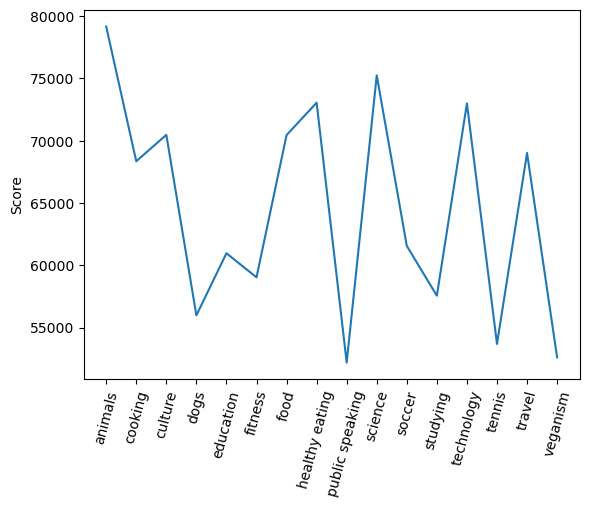

In [32]:
sns.lineplot(data=dfscore,x=dfscore.index.to_list(),y=dfscore["Score"])
plt.xticks(rotation=75)
plt.show()

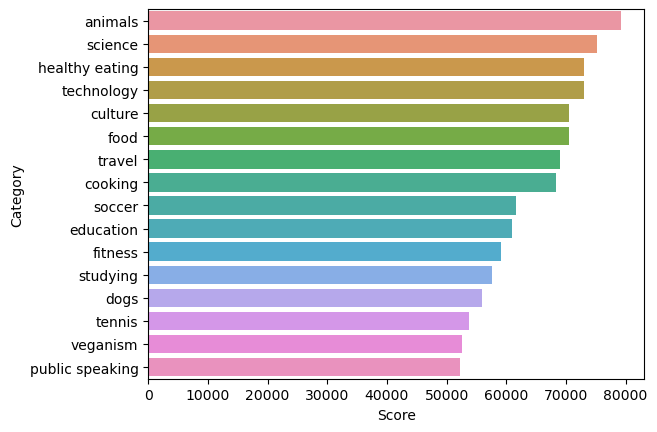

In [33]:
sns.barplot(dfscore.sort_values(by="Score",ascending=False)["Score"],dfscore.sort_values(by="Score",ascending=False)["Score"].index)
plt.show()

### Observations
- We get to see that the top 5 categories are animals, science, healthy eating, technology and culture.
- The best category is Animals.
- The worst categories are public speaking, veganism and tennis.

### Analysis of the top 5 categories

In [34]:
top=["animals","science","healthy eating","technology","culture"]

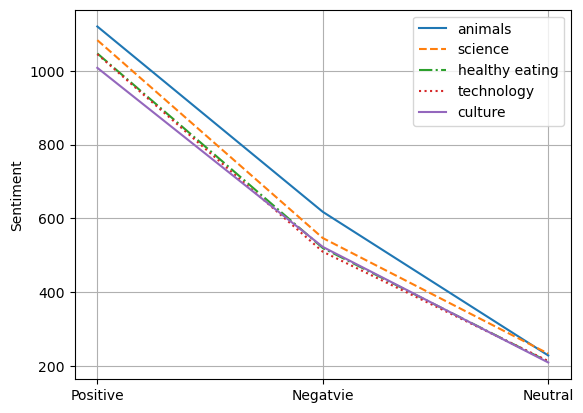

In [35]:
j=0
lst=["solid","--","dashdot","dotted","solid"]
for i in top:
    plt.plot()
    val=dfcopy.loc[i]["Sentiment"].value_counts()
    sns.lineplot(y=val,x=["Positive","Negatvie","Neutral"],ls=lst[j],label=i)
    j+=1
plt.grid()
plt.show()

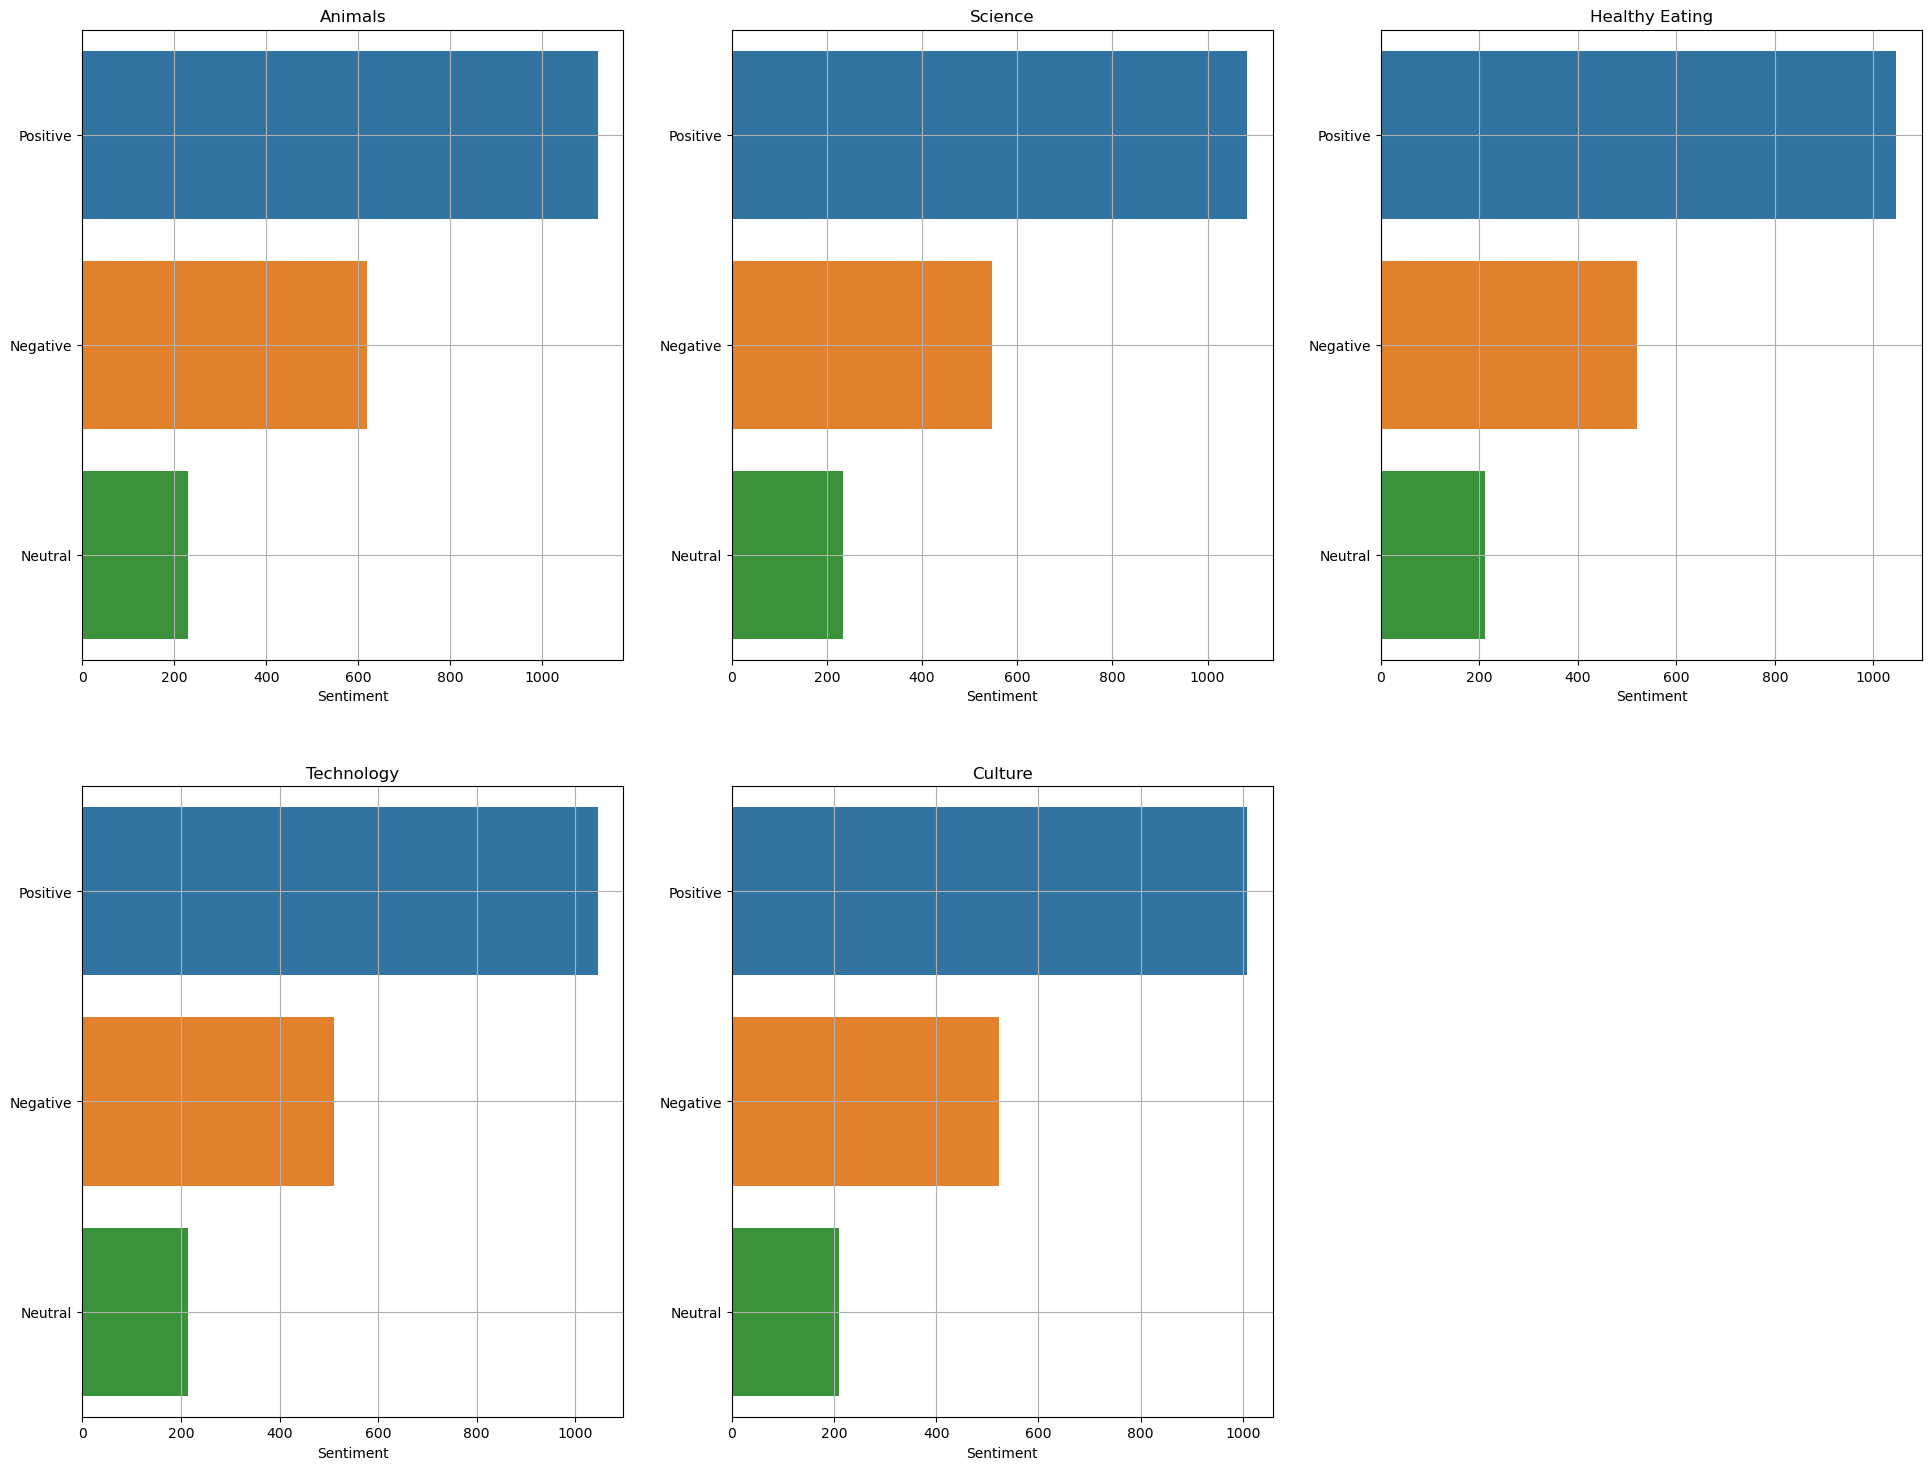

In [36]:
plt.subplot(2,3,1)
val=dfcopy.loc["animals"]["Sentiment"].value_counts()
l1=sns.barplot(x=val,y=["Positive","Negative","Neutral"])
plt.grid()
plt.title("Animals")

plt.subplot(2,3,2)
val=dfcopy.loc["science"]["Sentiment"].value_counts()
l2=sns.barplot(x=val,y=["Positive","Negative","Neutral"])
plt.grid()
plt.title("Science")

plt.subplot(2,3,3)
val=dfcopy.loc["healthy eating"]["Sentiment"].value_counts()
l3=sns.barplot(x=val,y=["Positive","Negative","Neutral"])
plt.grid()
plt.title("Healthy Eating")

plt.subplot(2,3,4)
val=dfcopy.loc["technology"]["Sentiment"].value_counts()
l4=sns.barplot(x=val,y=["Positive","Negative","Neutral"])
plt.grid()
plt.title("Technology")

plt.subplot(2,3,5)
val=dfcopy.loc["culture"]["Sentiment"].value_counts()
l5=sns.barplot(x=val,y=["Positive","Negative","Neutral"])
plt.grid()
plt.title("Culture")

plt.subplots_adjust(left=None, bottom=None, right=3, top=3, wspace=None, hspace=None)

plt.show()

### Observations
- The best positive to negative ratio is held by Technology.
- The worst positive to negative ratio is held by Culture.
- Highest number of reviews are recorded for Animals, they have maximum reviews of each type.

### Checking share of reviews held by each category

In [37]:
dfco["Num"]=1

In [38]:
dfco.groupby("Category").sum()["Num"].sort_values()

Category
public speaking    1266
veganism           1298
tennis             1384
dogs               1396
studying           1418
fitness            1457
education          1492
soccer             1520
travel             1716
cooking            1724
culture            1741
food               1762
technology         1769
healthy eating     1779
science            1864
animals            1967
Name: Num, dtype: int64

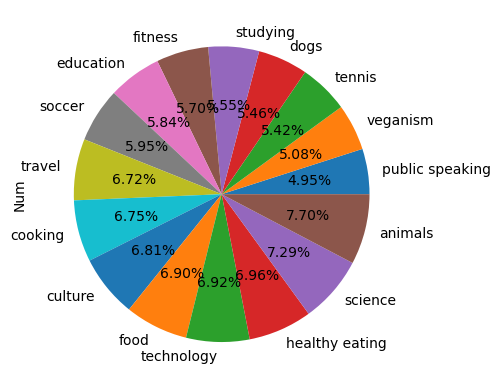

In [39]:
dfco.groupby("Category").sum()["Num"].sort_values().plot.pie(autopct="%1.2f%%")
plt.show()

### Share of reviews in the top five

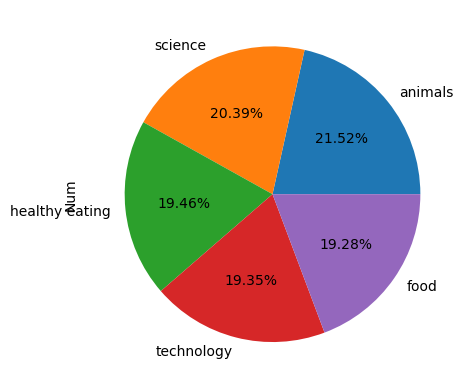

In [40]:
dfco.groupby("Category").sum()["Num"].sort_values(ascending=False)[0:5].plot.pie(autopct="%1.2f%%")
plt.show()

### Observations
- Maximum reviews have been found for the category of Animals, having a share of 21% in the top 5 categories and 7.7% overall.
- Minimum reviews have been found for the category Food, having a share of 19% in the top 5 categories.
- Minimum reviews have been found for the category Public speaking, having a share of 4.9% overall.

### Checking for correlation between Score and number of reviews

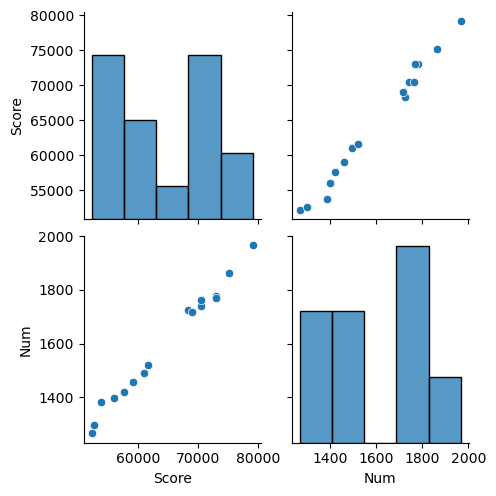

In [41]:
sns.pairplot(dfco.groupby("Category").sum())
plt.show()

### Observations
- We find a positive correlation between Score and Number of reviews.
- Thus we can conclude that content that is more controversial/ recieves more reviews has a better success rate.

### Checking which type of content fares better results

<AxesSubplot:xlabel='Score'>

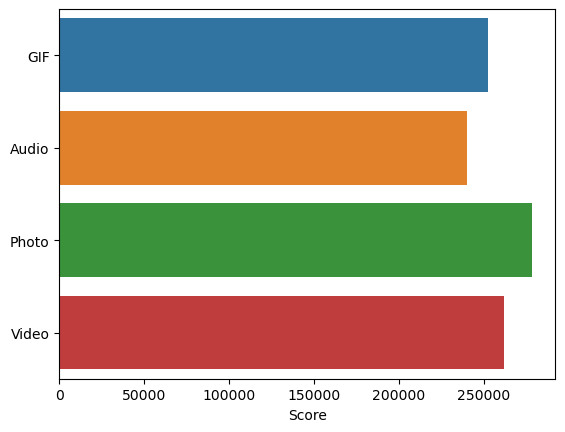

In [42]:
sns.barplot(x=dfco.groupby("Content_Type").sum()["Score"],y=["GIF","Audio","Photo","Video"])

### Observations
- Photo based content recieved the best reception.
- Audio based content recieved the worst reception.

In [43]:
dfcont=dfco.copy()

In [44]:
dfcont.drop(["Content ID","Reaction_Type","Sentiment"],inplace=True,axis=1)

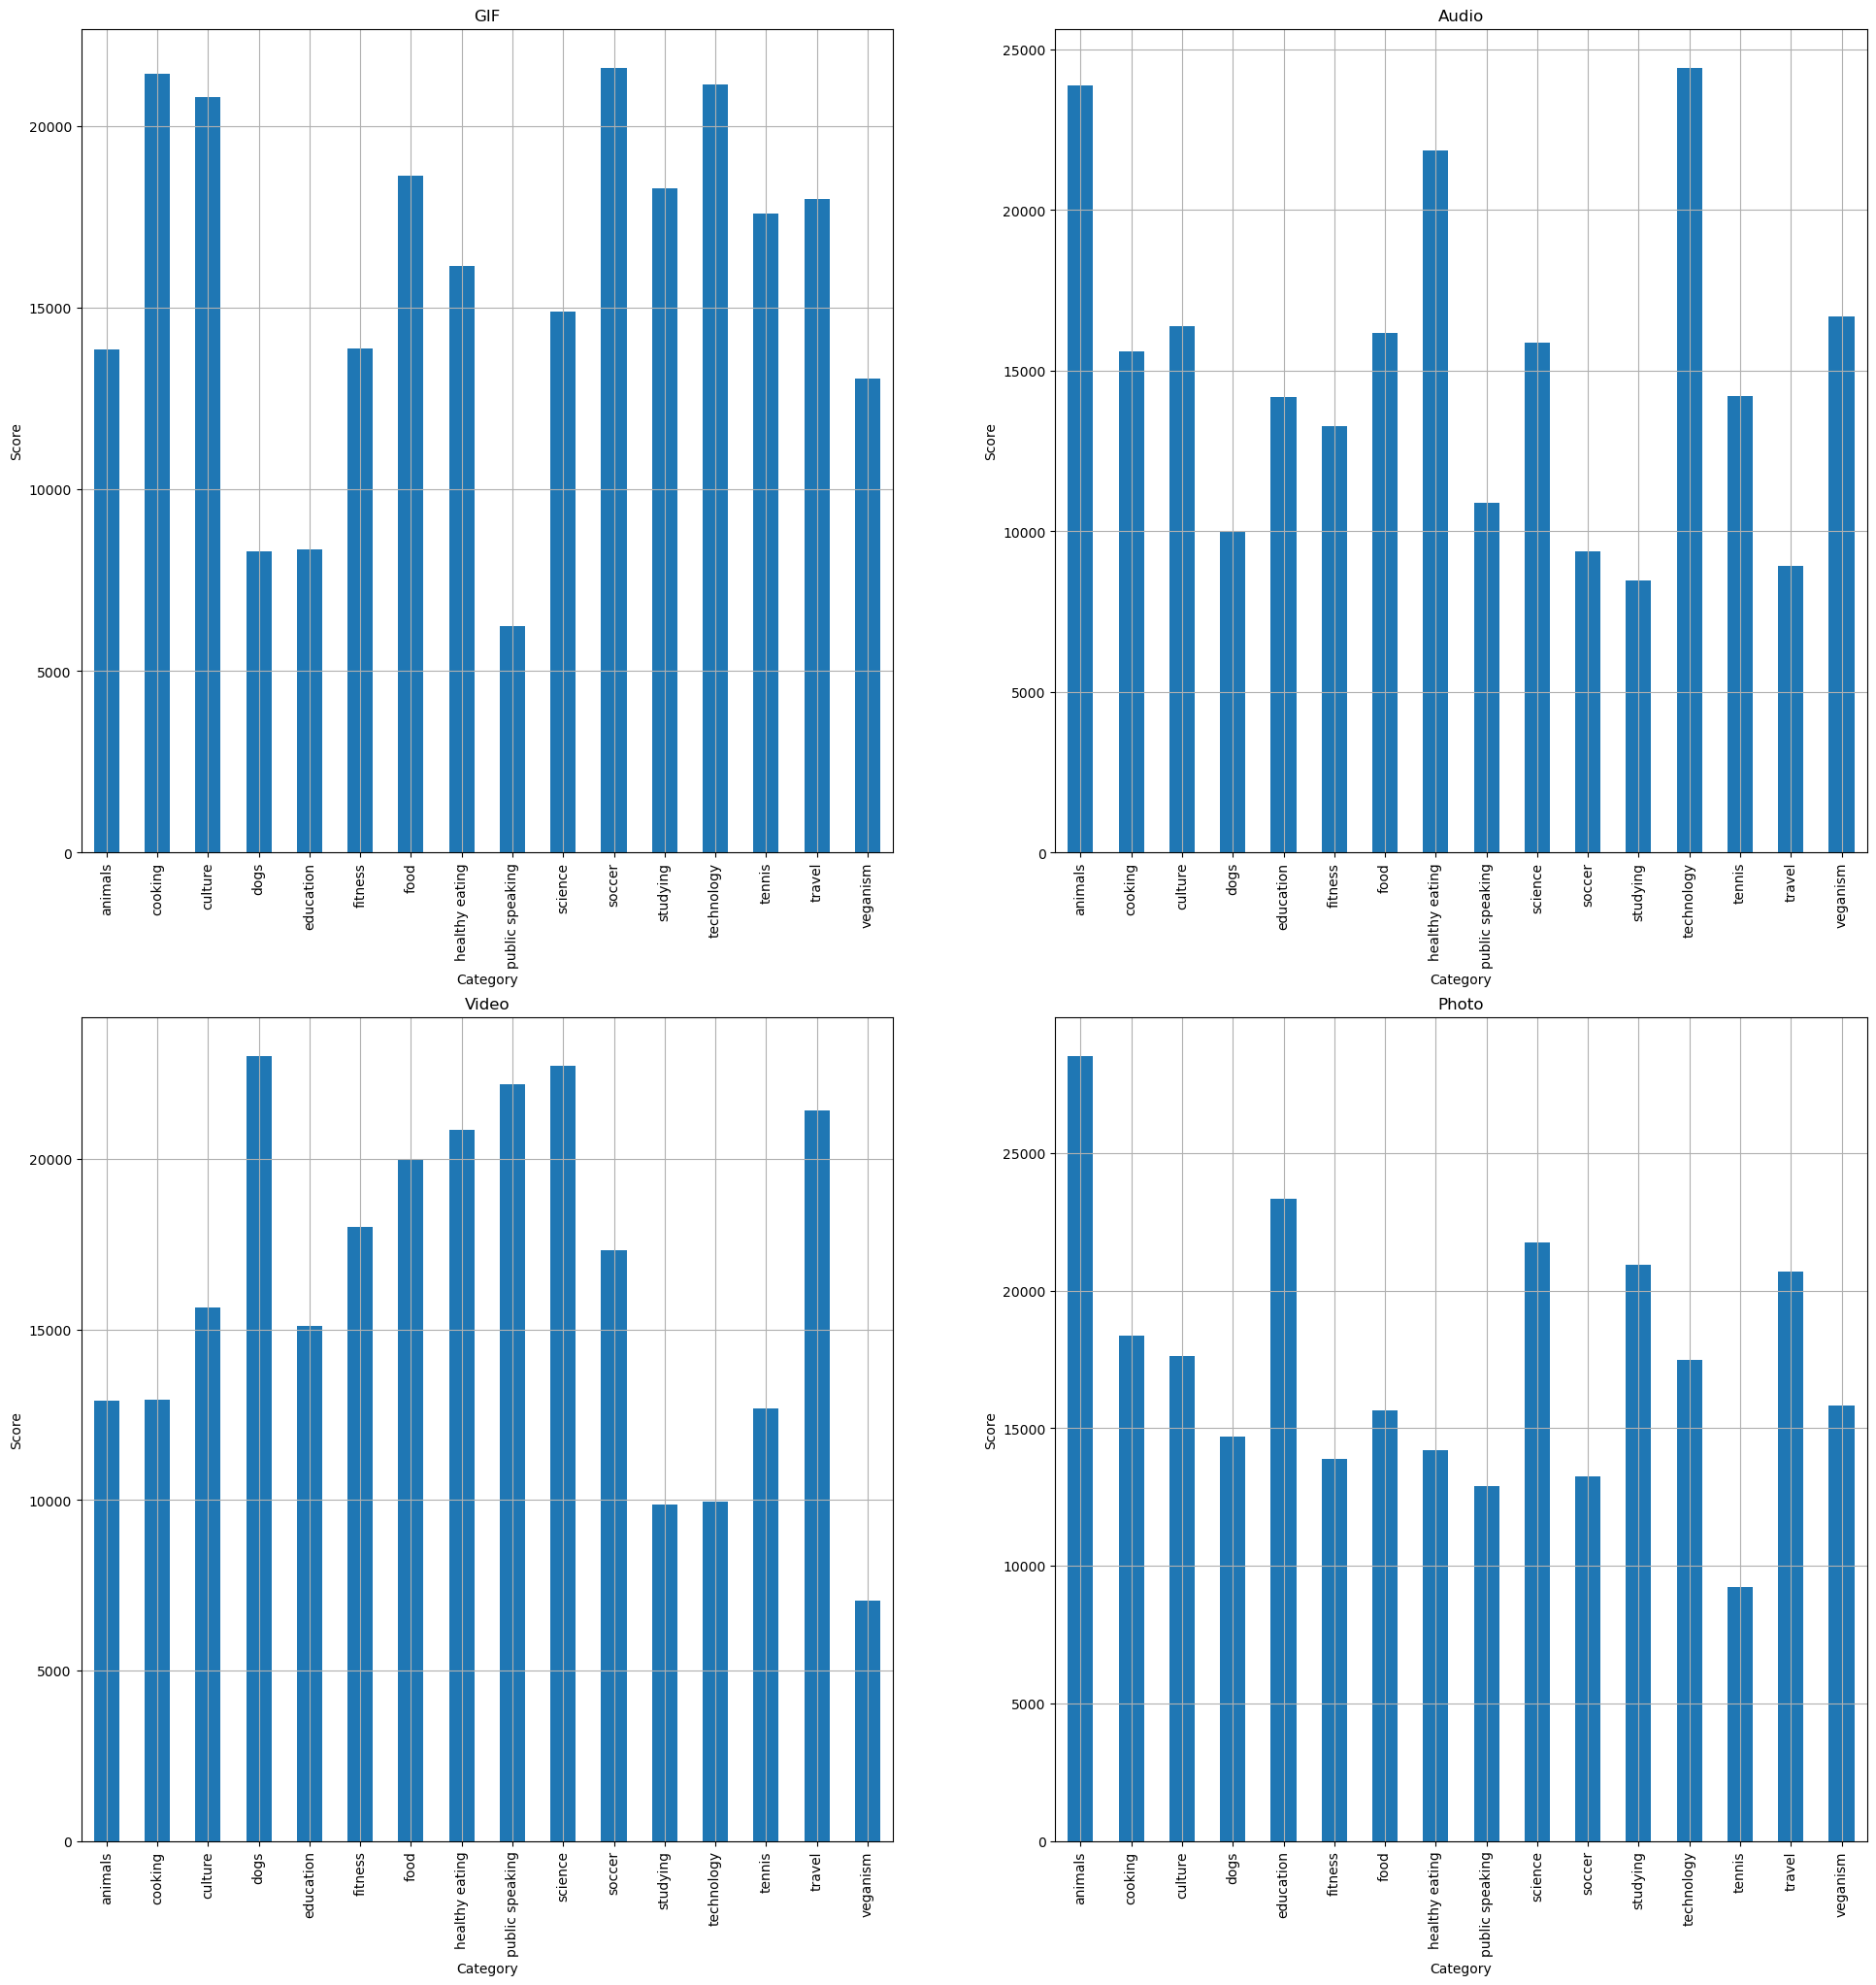

In [45]:
plt.subplot(2,2,1)
dfcont.groupby(["Content_Type","Category"]).sum()["Score"].loc["GIF"].plot.bar()
plt.grid()
plt.title("GIF")
plt.ylabel("Score")

plt.subplot(2,2,2)
dfcont.groupby(["Content_Type","Category"]).sum()["Score"].loc["audio"].plot.bar()
plt.grid()
plt.title("Audio")
plt.ylabel("Score")

plt.subplot(2,2,3)
dfcont.groupby(["Content_Type","Category"]).sum()["Score"].loc["video"].plot.bar()
plt.grid()
plt.title("Video")
plt.ylabel("Score")

plt.subplot(2,2,4)
dfcont.groupby(["Content_Type","Category"]).sum()["Score"].loc["photo"].plot.bar()
plt.grid()
plt.title("Photo")
plt.ylabel("Score")

plt.subplots_adjust(left=None, bottom=None, right=3, top=4, wspace=None, hspace=None)
plt.show()

### Observations
- In the category of GIFs, the most well recieved category is science while the least is public speaking.
- In the category of Audio, the most well recieved category is technology while the least is studying.
- In the category of Video, the most well recieved category is dogs, while the least is studying.
- In the category of Photo, the most well recieved category is animals while the least is tennis.

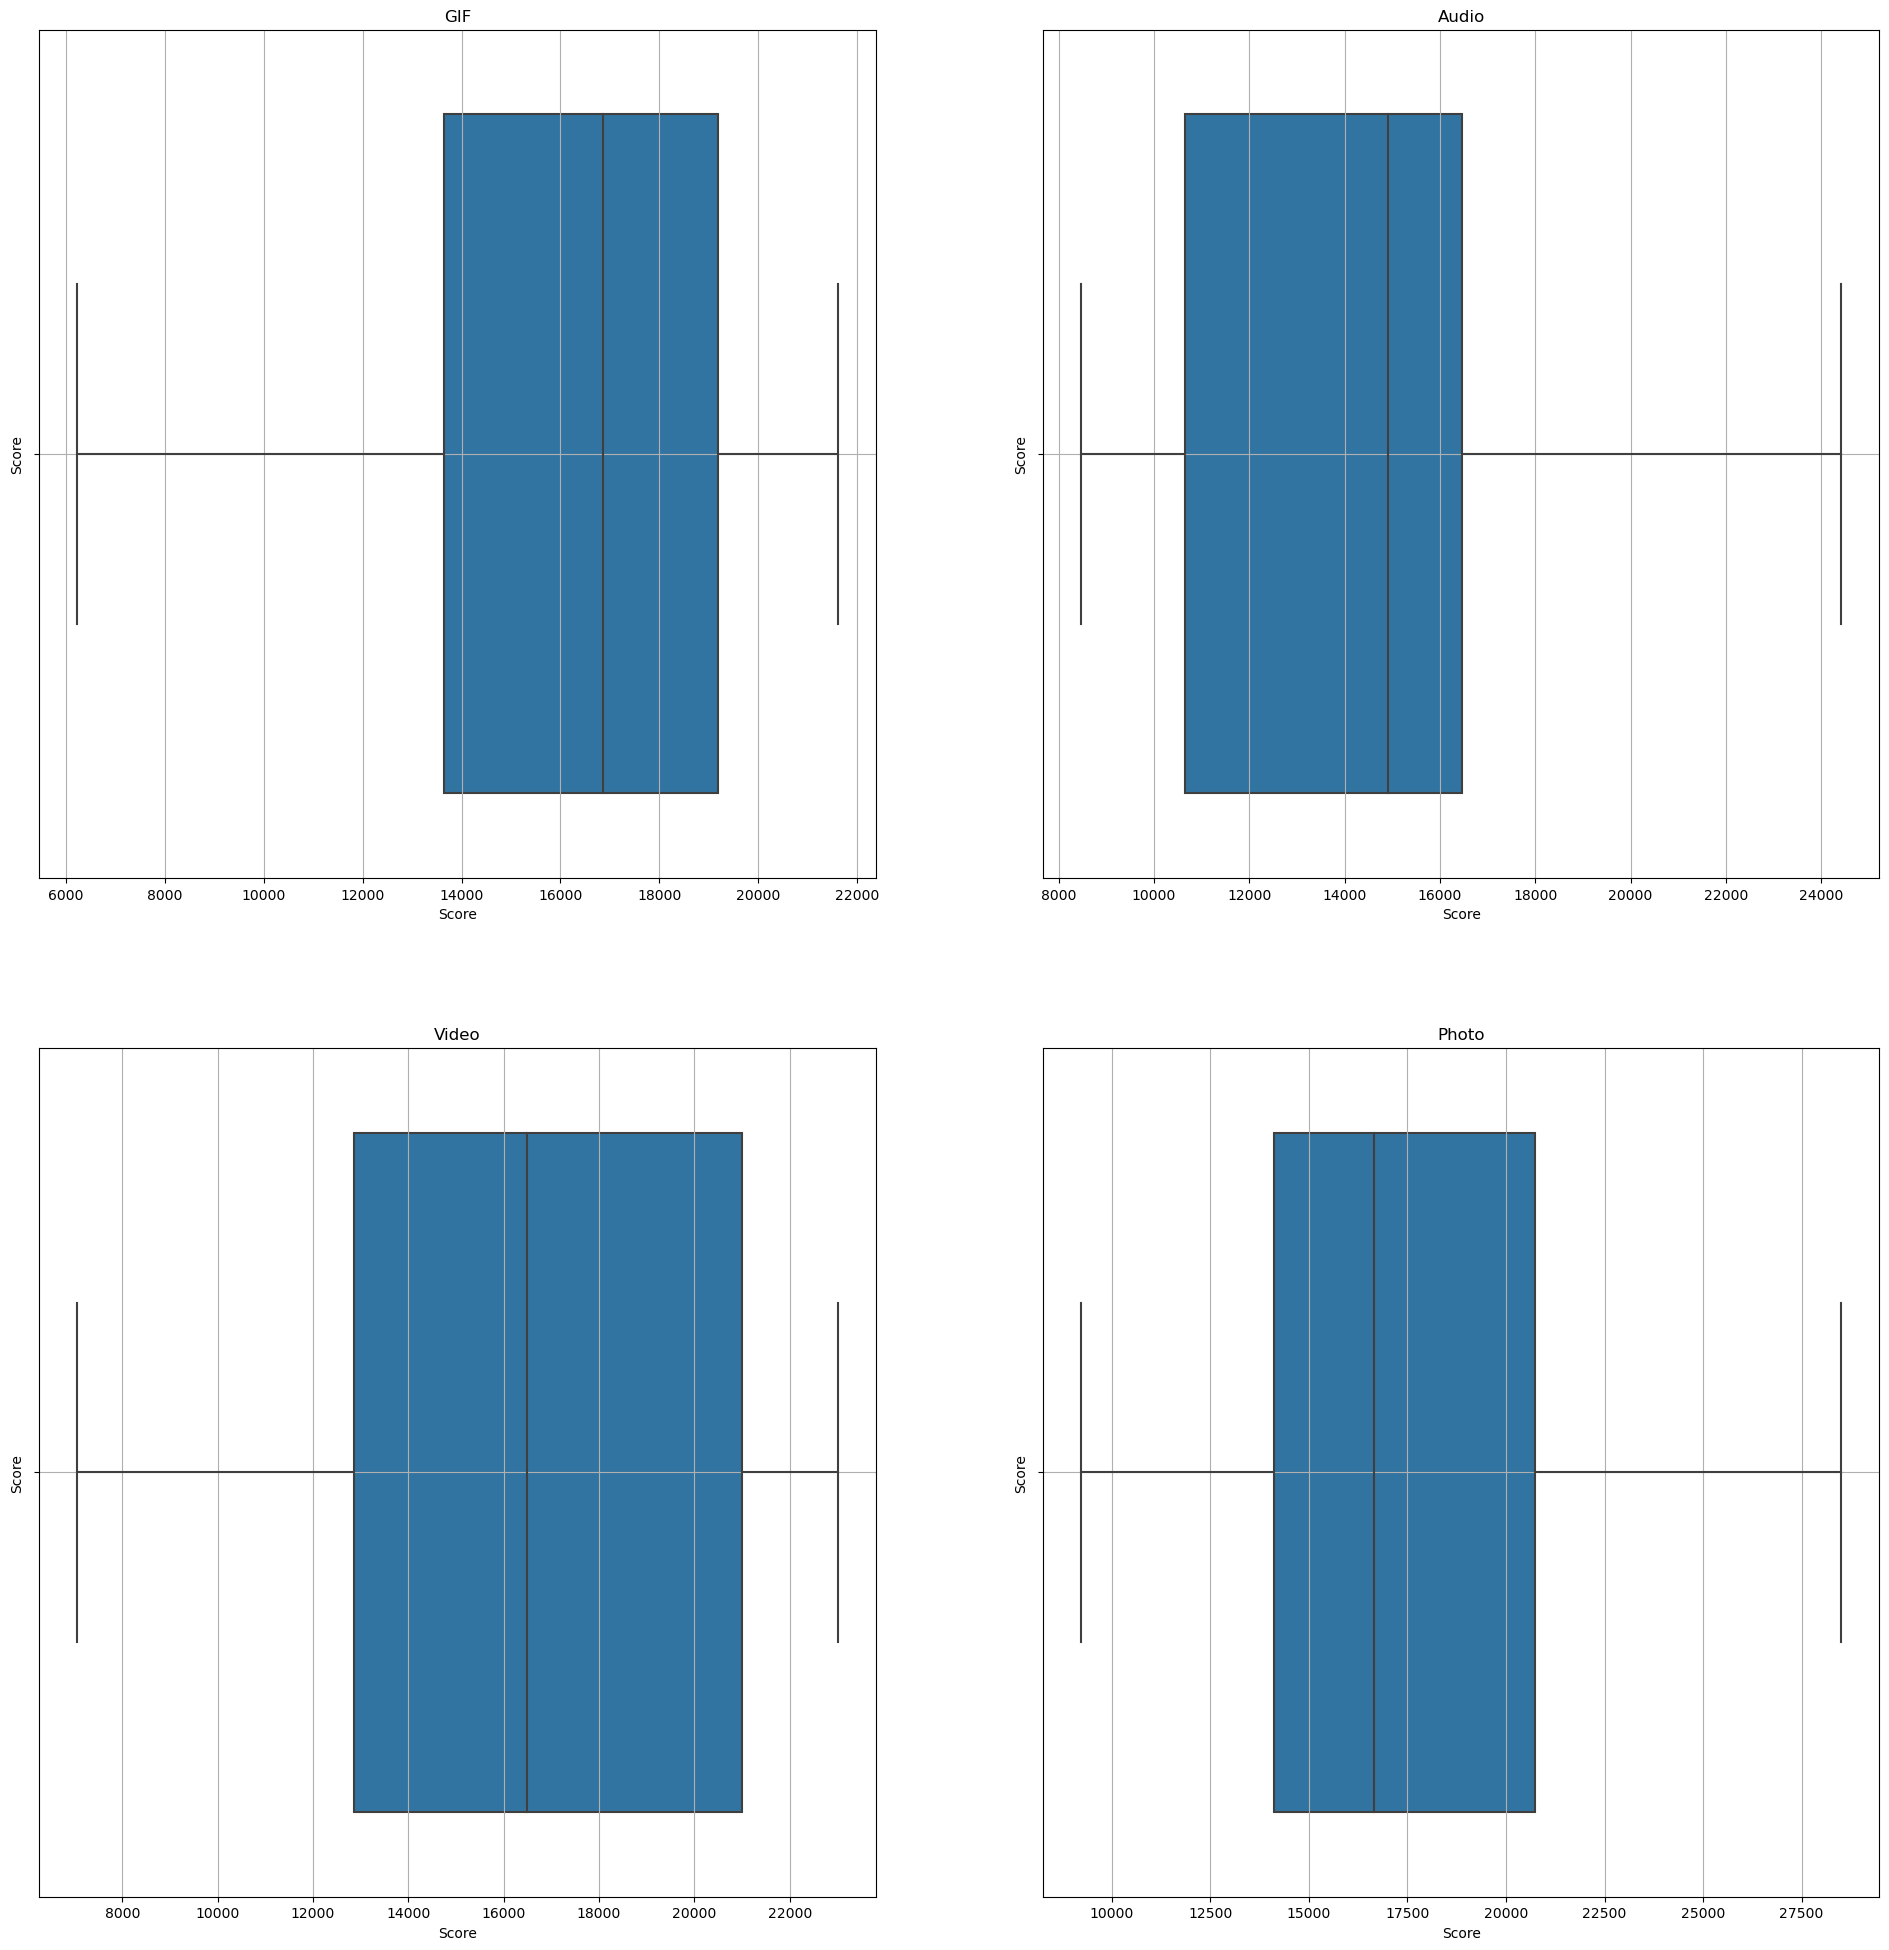

In [46]:
plt.subplot(2,2,1)
sns.boxplot(dfcont.groupby(["Content_Type","Category"]).sum()["Score"].loc["GIF"])
plt.grid()
plt.title("GIF")
plt.ylabel("Score")

plt.subplot(2,2,2)
sns.boxplot(dfcont.groupby(["Content_Type","Category"]).sum()["Score"].loc["audio"])
plt.grid()
plt.title("Audio")
plt.ylabel("Score")

plt.subplot(2,2,3)
sns.boxplot(dfcont.groupby(["Content_Type","Category"]).sum()["Score"].loc["video"])
plt.grid()
plt.title("Video")
plt.ylabel("Score")

plt.subplot(2,2,4)
sns.boxplot(dfcont.groupby(["Content_Type","Category"]).sum()["Score"].loc["photo"])
plt.grid()
plt.title("Photo")
plt.ylabel("Score")

plt.subplots_adjust(left=None, bottom=None, right=3, top=4, wspace=None, hspace=None)
plt.show()

### Observation
- For GIFs, the data is left skewed. Due to this the maximum value wont create much difference.
- For Audio, the data is right skewed. Due to this the maximum value will create a large amount of difference.
- For Video, the data  is left skewed. Due to this the maximum value wont create much difference.
- For Photo, the data is right skewed. Due to this the maximum value will create a large amount of difference.

### Category and Content wise Sentiment analysis 

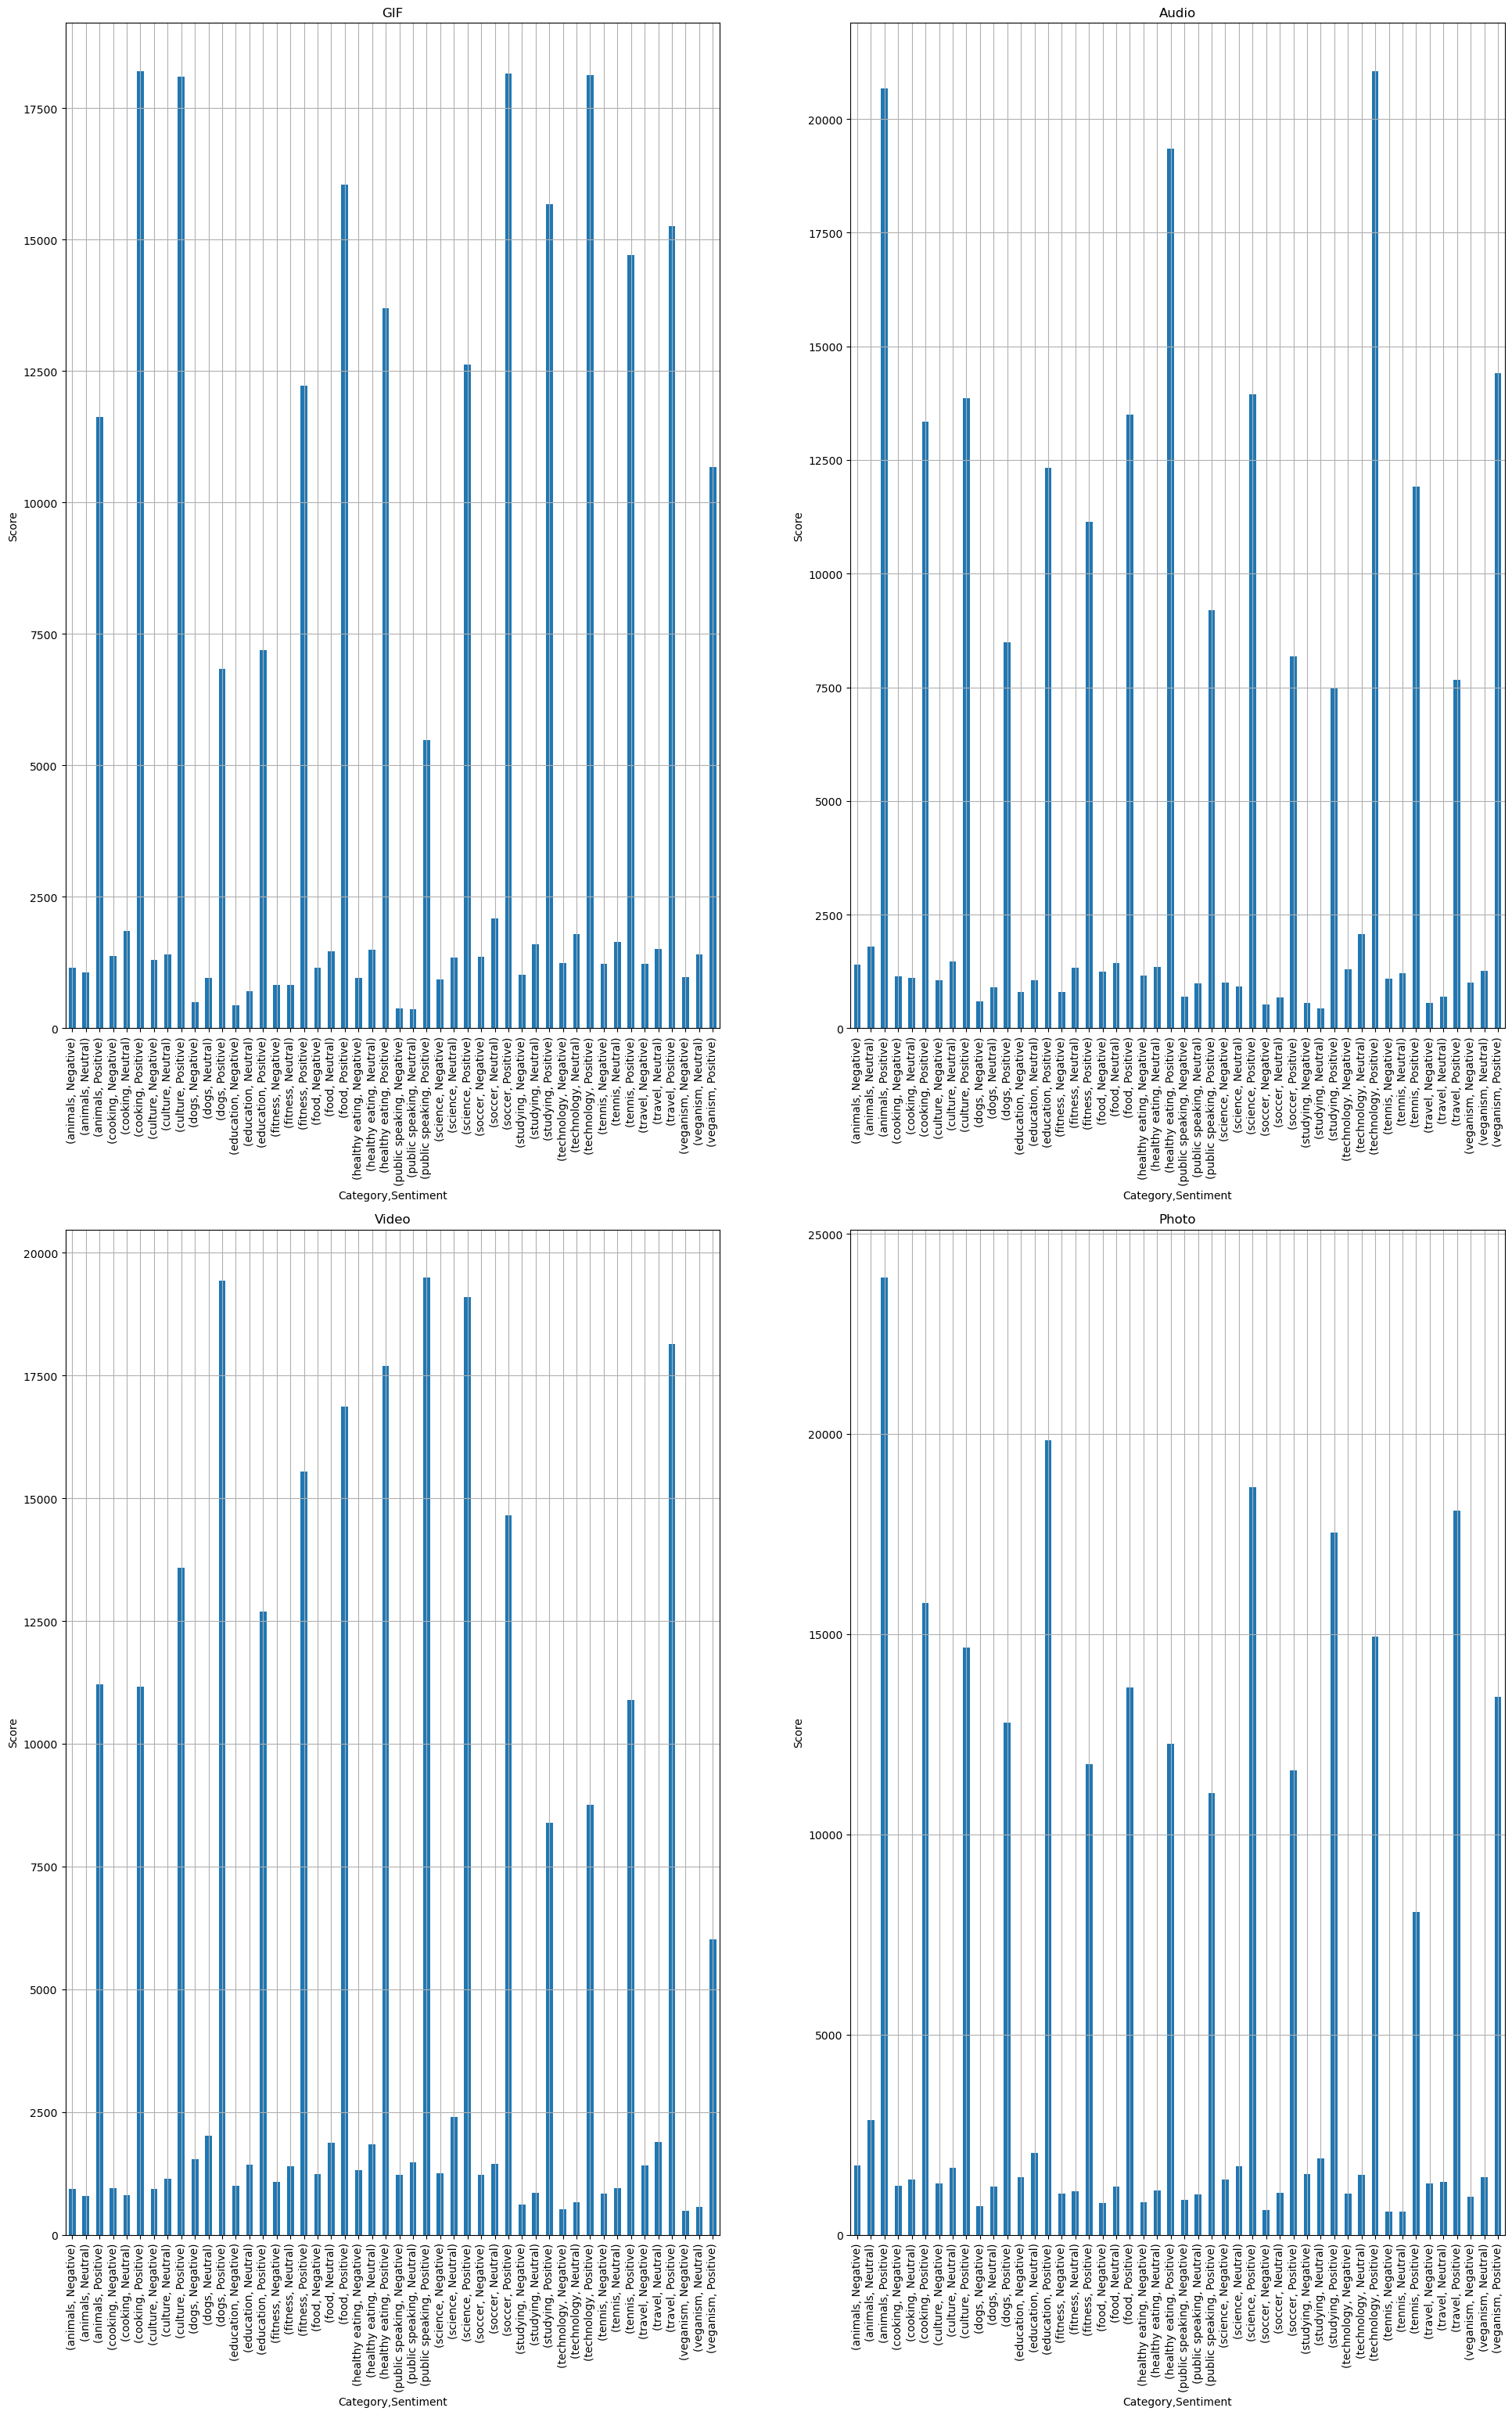

In [47]:
plt.subplot(2,2,1)
dfcopy.groupby(["Content_Type","Category","Sentiment"]).sum()["Score"].loc["GIF"].plot.bar()
plt.grid()
plt.title("GIF")
plt.ylabel("Score")

plt.subplot(2,2,2)
dfcopy.groupby(["Content_Type","Category","Sentiment"]).sum()["Score"].loc["audio"].plot.bar()
plt.grid()
plt.title("Audio")
plt.ylabel("Score")

plt.subplot(2,2,3)
dfcopy.groupby(["Content_Type","Category","Sentiment"]).sum()["Score"].loc["video"].plot.bar()
plt.grid()
plt.title("Video")
plt.ylabel("Score")

plt.subplot(2,2,4)
dfcopy.groupby(["Content_Type","Category","Sentiment"]).sum()["Score"].loc["photo"].plot.bar()
plt.grid()
plt.title("Photo")
plt.ylabel("Score")

plt.subplots_adjust(left=None, bottom=None, right=3, top=6, wspace=None, hspace=None)
plt.show()

### Observation
- In the GIF category highest absolute positive reponse is recieved by Soccer, while the worst is recieved by dogs category.
- In the audio category highest absolute positive reponse is recieved by tech, while the worst is recieved by animals category.
- In the video category highest absolute positive reponse is recieved by dogs, while the worst is recieved by travel category.
- In the photo category highest absolute positive reponse is recieved by animals, while the worst is recieved by animals category.

# Inference
### On the basis of the various observations made from the data, we can draw various inferences.
### If the goal is to garner views or to have the highest score-
- The animal category is the best overall for content, it is due to the fact that it recieves the highest number of responses among the Auido and the Photo category while being on second for video. For the GIF content, animal category performs averagely but since the GIF content viewerbase is not that large the animal category still manages to outperform others. The animal category recieved 57.2% positive response, which is lower than other ccategories but since our goal is to simply maximize views it fulfils the purpose. This is due the fact that the category manages to get 7.73% of the total views, which is far above any other category. To be completely specific, the Photos in the animal category perform the best.

### If the goal is to recieve positive response or to have the highest score in the positive category-
- The technology category is the best overall for content that recives the best feedback, is it due to the fact that it has the best positive to negative feedback ratio. Along with that it also has the highest absolute positive feedback in the audio category while being close by in the category of GIF, photo and video. The tech category has positive to negative ratio of 2.24 which is a lot higher than other categories, the second position is held by healthy eating content at 2.05. Apart from this, the tech category is also the fourth largest category, garnering 6.92% of the total views. To be specific, the audio and GIF content in the technology category is the best for this goal.